### Lesson outline

Pandas makes it very convenient to compute various statistics on a dataframe:

- Global statistics: [mean](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html), [median](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html), [std](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html), [sum](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html), etc. [[more]](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats)
- Rolling statistics: [rolling_mean](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.rolling_mean.html), [rolling_std](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.rolling_std.html), etc. [[more]](http://pandas.pydata.org/pandas-docs/stable/computation.html?highlight=rolling%20statistics#moving-rolling-statistics-moments)


You will use these functions to analyze stock movement over time.

Specifically, you will compute:

- Bollinger Bands: A way of quantifying how far stock price has deviated from some norm.
- Daily returns: Day-to-day change in stock price.


<IPython.core.display.Javascript object>


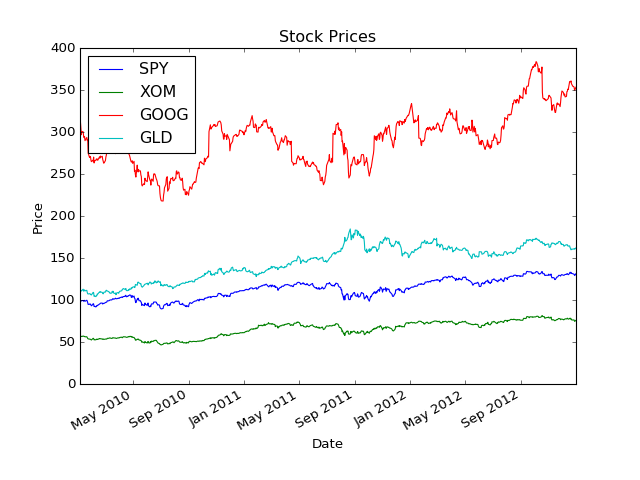

Mean values:
SPY     112.771641
XOM      65.226145
GOOG    290.865224
GLD     145.029775
dtype: float64

Median values:
SPY     113.837218
XOM      68.027783
GOOG    292.365629
GLD     150.294998
dtype: float64

Standard deviation values:
SPY     11.714097
XOM      9.460080
GOOG    33.101322
GLD     20.897316
dtype: float64


In [20]:
"""Compute global statistics"""

import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib nbagg

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol).format(symbol), index_col='Date',
                             parse_dates=True,usecols=['Date', 'Adj Close'], 
                              na_values=['nan'])
        #Rename to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY': #Drop dates SPY did not trade
            df = df.dropna(subset=['SPY'])   

    return df

def plot_data(df, title = 'Stock Prices', fontsize = 2):
    '''Plot stock prices'''
    ax = df.plot(title=title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show() #must be called to show plots in some environments


def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2012-12-31') #The interval between 2010-2012

    # Choose stock symbols to read
    symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
    
    # Get stock data
    df = get_data(symbols, dates)
    plot_data(df)
    
    # Compute global statistics for each stock
    print 'Mean values:\n', df.mean()
    print '\nMedian values:\n', df.median()
    print '\nStandard deviation values:\n', df.std()


if __name__ == "__main__":
    test_run()

<IPython.core.display.Javascript object>


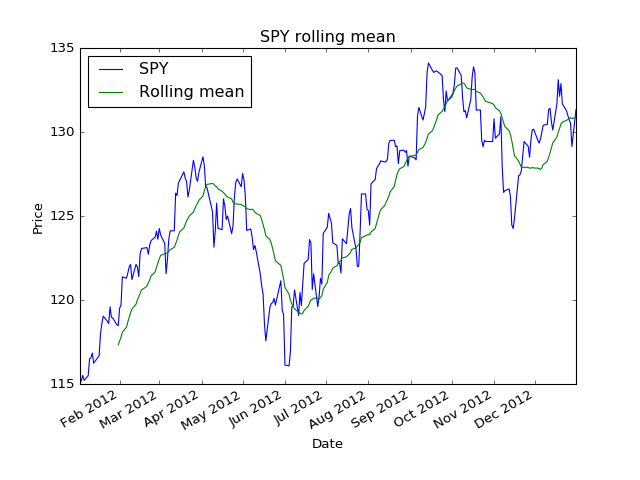

/home/collumbus/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:55: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()


In [25]:
"""Computing rolling statistics"""

import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib nbagg

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol).format(symbol), index_col='Date',
                             parse_dates=True,usecols=['Date', 'Adj Close'], 
                              na_values=['nan'])
        #Rename to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY': #Drop dates SPY did not trade
            df = df.dropna(subset=['SPY'])   

    return df

def plot_data(df, title = 'Stock Prices', fontsize = 2):
    '''Plot stock prices'''
    ax = df.plot(title=title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show() #must be called to show plots in some environments


def test_run():
    # Define a date range
    dates = pd.date_range('2012-01-01', '2012-12-31') #The year 2012

    # Choose stock symbols to read
    symbols = ['SPY']
    
    # Get stock data
    df = get_data(symbols, dates)

    
    # Plot SPY data, retain matplotlib axis object
    ax = df['SPY'].plot(title='SPY rolling mean', label='SPY')
    
    # Compute rolling mean using a 20 day window
    rm_SPY = pd.rolling_mean(df['SPY'], window=20)
    
    # Add rolling mean to same plot
    rm_SPY.plot(label='Rolling mean', ax=ax)
    
    # Add axis labels and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='upper left')
    plt.show()

if __name__ == "__main__":
    test_run()

---
## Quiz: Calculate Bollinger Bands

<IPython.core.display.Javascript object>


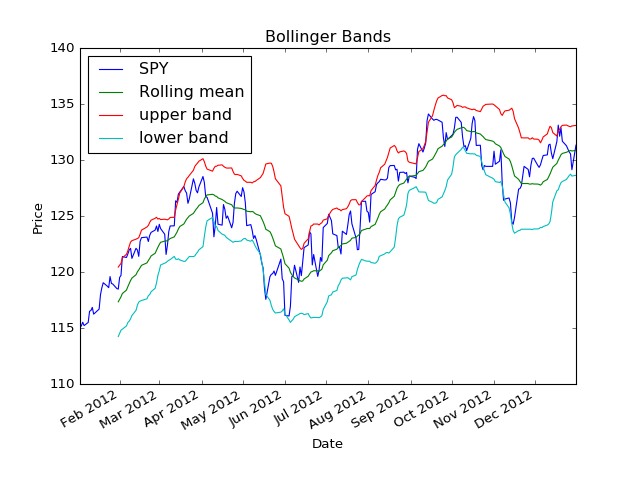

In [35]:
"""Bollinger Bands."""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(window=window).mean()


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return values.rolling(window=window).std()

def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band = rm + (2 * rstd)
    lower_band = rm - (2 * rstd)
    return upper_band, lower_band


def test_run():
    # Read data
    dates = pd.date_range('2012-01-01', '2012-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)

    # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_SPY = get_rolling_mean(df['SPY'], window=20)

    # 2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df['SPY'], window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
    rm_SPY.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()


if __name__ == "__main__":
    test_run()


---

---
## Quiz: Compute daily returns

<IPython.core.display.Javascript object>


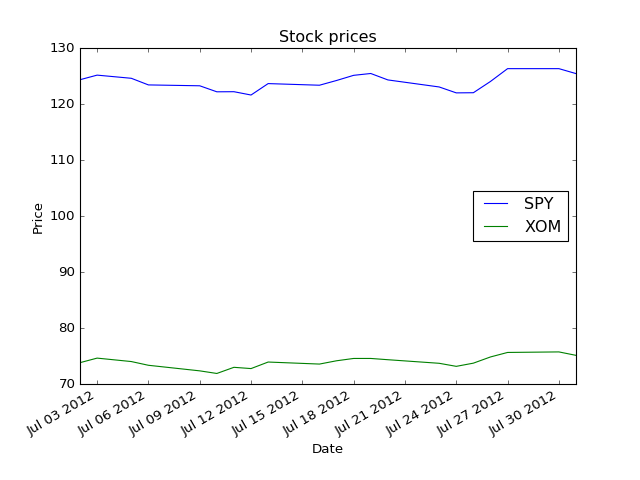

<IPython.core.display.Javascript object>


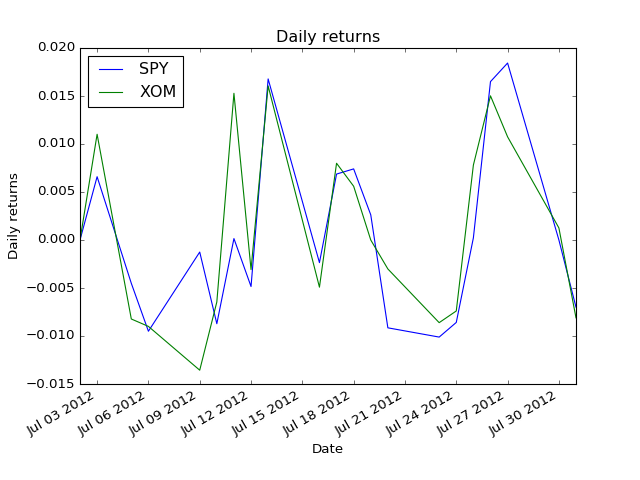

In [41]:
"""Compute daily returns."""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # NumPy's way
    #daily_returns = df.copy() #copy given DataFrame to match and size column names
    #daily_returns[1:] = (df[1:] / df[:-1].values) - 1
    #daily_returns.ix[0, :] = 0 #set daily returns for 0 to 0
    
    #Pandas' way
    daily_returns = (df / df.shift(1))-1 
    daily_returns.ix[0, :] = 0 # Pandas leaves the 0th row of NaNs
    return daily_returns

def test_run():
    # Read data
    dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
    symbols = ['SPY','XOM']
    df = get_data(symbols, dates)
    plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")


if __name__ == "__main__":
    test_run()


---

In [ ]:
'''Cumulative returns'''

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # NumPy's way
    #daily_returns = df.copy() #copy given DataFrame to match and size column names
    #daily_returns[1:] = (df[1:] / df[:-1].values) - 1
    #daily_returns.ix[0, :] = 0 #set daily returns for 0 to 0
    
    #Pandas' way
    daily_returns = (df / df.shift(o))-1 
    daily_returns.ix[0, :] = 0 # Pandas leaves the 0th row of NaNs
    return daily_returns

def test_run():
    # Read data
    dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
    symbols = ['SPY','XOM']
    df = get_data(symbols, dates)
    plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")


if __name__ == "__main__":
    test_run()
